# Replication code for "The impacts of the Amazon Soy Moratorium on deforestation" 
Heilmayr, Rausch, Munger and Gibbs

## Import packages and define data location

In [1]:
import sys
sys.path.append('D:/dev/glue-sb/')
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import gridspec
import seaborn as sns
%matplotlib inline 
import numpy as np
import dirfuncs
import plot_tools

In [2]:
dropbox_dir = dirfuncs.guess_dropbox_dir()
data_dir = dropbox_dir + 'soyM/analysis/8-20-19/'

## Set plotting parameters

In [3]:
palette = ['#CD6699', '#448970', '#F5CA7A']
palette = {'notleg': palette[0],
           'notbiom': palette[2],
           'soym': palette[1],
           'neutral': 'black'}
fig_dir = data_dir + 'figures/'
font = {'family' : 'sans-serif',
        'weight': 'normal',
        'size'   : 16}
matplotlib.rc('font', **font)

## Load and prep data

In [4]:
defor_csv = data_dir + 'long.csv'
defor_df = pd.read_csv(defor_csv)
# defor_df['on_car'] = np.logical_not(defor_df['propid'].isnull())
# defor_df['gts_car'] = defor_df['gts'].astype(int) & defor_df['on_car']
defor_df['late'] = defor_df['year']>2005
buffer = 300
sample_df = defor_df.loc[((defor_df['dist_amb']>-buffer) & (defor_df['dist_aml']<buffer))]

MemoryError: 

In [ ]:
wide_csv = data_dir + 'wide.csv'
wide_df = pd.read_csv(wide_csv)

In [5]:
soy_csv = data_dir + 'soy_conversion.csv'
soy_df = pd.read_csv(soy_csv)

## Figure 2 - Primary trend comparison

In [72]:
sample_df['gaez_soy_suit'] = (sample_df['GAEZsuit']>40).astype(int)
sample_df['soy_suit'] = ((sample_df['gaez_soy_suit']==1) & (sample_df['suit']>0)).astype(int)
suit_var = 'soy_suit'

C:\Program Files\ArcGIS\Pro\bin\Python\envs\arcAnalysis\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Program Files\ArcGIS\Pro\bin\Python\envs\arcAnalysis\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [73]:
out_var = 'mb2_vdefor'
defor = pd.pivot_table(sample_df, columns = 'year', index = [suit_var, 'biome', 'legal_amazon'], values = out_var, 
                       aggfunc = 'sum')
forest = pd.pivot_table(sample_df, columns = 'year', index = [suit_var, 'biome', 'legal_amazon'], values = out_var, 
                        aggfunc = 'count')
defor_shr = ((defor / forest) * 100).dropna(axis = 1).T.loc[2002:2016]
defor_shr = defor_shr.T

In [77]:
time_csv = data_dir + 'figures/f2_time_plot.csv'
time_df = pd.read_csv(time_csv)
time_df = time_df.iloc[1:-1]
time_df.columns = ['var', 'estimate']
time_df['var'] = np.repeat(time_df['var'].dropna(), 2).values
time_df['stat'] = np.tile(['coef', 'ci'], int((time_df.shape[0]/2)))
time_df = time_df.set_index(['stat', 'var'])
time_df = time_df.unstack().T.reset_index()
soy_rows = [var for var in time_df['var'] if (suit_var in var) & ('biome' in var) & ('year' in var)]
biome_rows = [var for var in time_df['var'] if (suit_var not in var) & ('biome' in var) & ('year' in var)]
soytime_df = time_df.loc[time_df['var'].isin(soy_rows)]
biome_df = time_df.loc[time_df['var'].isin(biome_rows)]

def clean_time(df):
    df['year'] = df['var'].apply(lambda x: int(x[:4]))
    df['coef'] = df['coef'].apply(lambda x: float(x)) * 100
    df['lb'] = df['ci'].apply(lambda x: float(x.split(',')[0])) * 100
    df['ub'] = df['ci'].apply(lambda x: float(x.split(',')[1])) * 100
    df['err'] = df['coef'] - df['lb']
    return df
soytime_df = clean_time(soytime_df)
biome_df = clean_time(biome_df)

C:\Program Files\ArcGIS\Pro\bin\Python\envs\arcAnalysis\lib\site-packages\ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app
C:\Program Files\ArcGIS\Pro\bin\Python\envs\arcAnalysis\lib\site-packages\ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()
C:\Program Files\ArcGIS\Pro\bin\Python\envs\arcAnalysis\lib\site-packages\ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFram

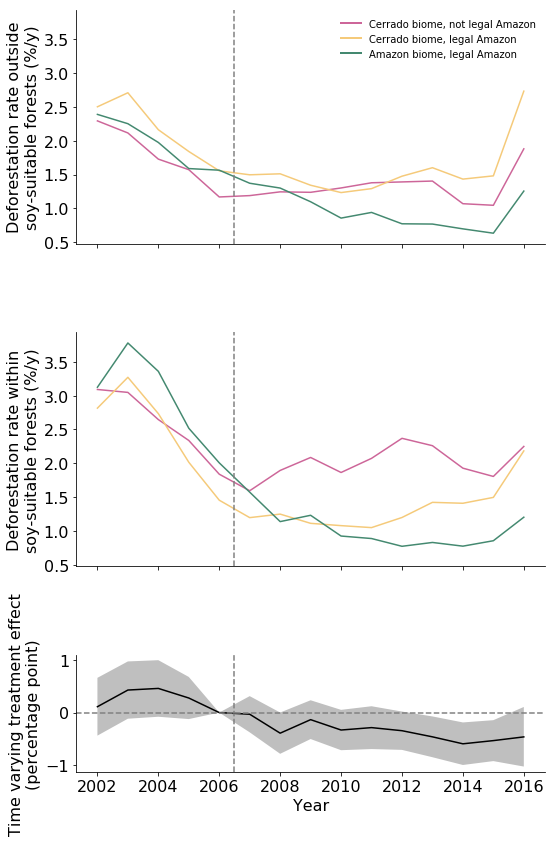

In [78]:
gs = gridspec.GridSpec(3, 1, height_ratios=[2, 2, 1]) 
fig = plt.figure(figsize=(8,12))
ax2 = plt.subplot(gs[2])
ax0 = plt.subplot(gs[0])
ax1 = plt.subplot(gs[1], sharex = ax0, sharey = ax0)
ax0.plot(defor_shr.columns, defor_shr.loc[(0,0,0)], color = palette['notleg'], linestyle = '-')
ax0.plot(defor_shr.columns, defor_shr.loc[(0,0,1)], color = palette['notbiom'], linestyle = '-')
ax0.plot(defor_shr.columns, defor_shr.loc[(0,1,1)], color = palette['soym'], linestyle = '-')
ax1.plot(defor_shr.columns, defor_shr.loc[(1,0,0)], color = palette['notleg'], linestyle = '-')
ax1.plot(defor_shr.columns, defor_shr.loc[(1,0,1)], color = palette['notbiom'], linestyle = '-')
ax1.plot(defor_shr.columns, defor_shr.loc[(1,1,1)], color = palette['soym'], linestyle = '-')
sns.despine()
handles = [plt.Line2D(range(10), range(10), linestyle='-', color = palette['notleg'], linewidth = 2),
           plt.Line2D(range(10), range(10), linestyle='-', color = palette['notbiom'], linewidth = 2),
           plt.Line2D(range(10), range(10), linestyle='-', color = palette['soym'], linewidth = 2)]
ax0.set_ylabel('Deforestation rate outside\nsoy-suitable forests (%/y)')
ax1.set_ylabel('Deforestation rate within\nsoy-suitable forests (%/y)')
ax2.set_xlabel('Year')
ax0.axvline(x = 2006.5, color = 'grey', linestyle = '--')
ax1.axvline(x = 2006.5, color = 'grey', linestyle = '--')
labels = ['Cerrado biome, not legal Amazon', 'Cerrado biome, legal Amazon', 'Amazon biome, legal Amazon']
lgd = ax0.legend(handles, labels, fontsize = 10, frameon = False)
ax2.set_ylabel('Time varying treatment effect\n(percentage point)')
ax2.plot(soytime_df['year'].values, soytime_df['coef'].values, color = 'black')
ax2.fill_between(soytime_df['year'], soytime_df['lb'], soytime_df['ub'], alpha = 0.5, facecolor='grey', interpolate=False)
ax0.set_xticklabels([])
ax1.set_xticklabels([])
ax2.axvline(x = 2006.5, color = 'grey', linestyle = '--')
ax2.axhline(y = 0, color = 'grey', linestyle = '--')
sns.despine()
fig.tight_layout()
fig.savefig(data_dir + 'figures/f2_summary.svg')

## Figure 3 - Soy establishment trends

In [6]:
soy_df = soy_df.loc[(soy_df['dist_amb']>-300) & (soy_df['dist_aml']<300)]
soy_subset = soy_df.loc[soy_df['a_start_soy']==0]

In [7]:
soy_subset.loc[(soy_subset['year']==2017) & (soy_subset['biome']==1), 'mb_start_for'].value_counts()

1.0    147129
0.0     36216
Name: mb_start_for, dtype: int64

In [8]:
soy_subset.loc[(soy_subset['year']==2017) & (soy_subset['biome']==1) & (soy_subset['mb_start_for']==0), 'a_soy'].value_counts()

0    33585
1     2631
Name: a_soy, dtype: int64

In [9]:
summary_df = pd.pivot_table(soy_subset, index = 'a_soy', 
                            columns = ['year', 'mb_start_for', 'legal_amazon', 'biome'], values = 'ptid', aggfunc = len)
convert_df = (summary_df.loc[1] / (summary_df.loc[0] + summary_df.loc[1])).unstack(level=0)*100
convert_df = convert_df.rename(columns = {2006: '2000-2006', 2017: '2007-2017'})

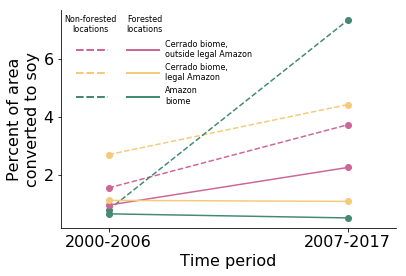

In [60]:
fig, ax = plt.subplots()
ax.plot(convert_df.loc[(0,0,0)], marker = 'o', linestyle = '--', color = palette['notleg'])
ax.plot(convert_df.loc[(0,1,0)], marker = 'o', linestyle = '--', color = palette['notbiom'])
ax.plot(convert_df.loc[(0,1,1)], marker = 'o', linestyle = '--', color = palette['soym'])
ax.plot(convert_df.loc[(1,0,0)], marker = 'o', linestyle = '-', color = palette['notleg'])
ax.plot(convert_df.loc[(1,1,0)], marker = 'o', linestyle = '-', color = palette['notbiom'])
ax.plot(convert_df.loc[(1,1,1)], marker = 'o', linestyle = '-', color = palette['soym'])
ax.set_ylabel('Percent of area\nconverted to soy')
ax.set_xlabel('Time period')
ax.set_xlim((-0.2, 1.2))

sns.despine()
handle_len = 50
handles = [plt.Line2D(range(handle_len), range(handle_len), linestyle='-', color = palette['notleg'], linewidth = 2),
           plt.Line2D(range(handle_len), range(handle_len), linestyle='-', color = palette['notbiom'], linewidth = 2),
           plt.Line2D(range(handle_len), range(handle_len), linestyle='-', color = palette['soym'], linewidth = 2)]
labels = ['Cerrado biome,\noutside legal Amazon', 'Cerrado biome,\nlegal Amazon', 'Amazon\nbiome']
lgd1 = ax.legend(handles, labels, fontsize = 8, frameon = False, loc = "upper left", bbox_to_anchor=(.175,.9), handlelength = 4)
handles = [plt.Line2D(range(handle_len), range(handle_len), linestyle='--', color = palette['notleg'], linewidth = 2),
           plt.Line2D(range(handle_len), range(handle_len), linestyle='--', color = palette['notbiom'], linewidth = 2),
           plt.Line2D(range(handle_len), range(handle_len), linestyle='--', color = palette['soym'], linewidth = 2)]
labels = ['\n', '\n', '\n']
lgd2 = ax.legend(handles, labels, fontsize = 8, frameon = False, loc = "upper left", bbox_to_anchor=(0.025,.9), handlelength=4)
ax.add_artist(lgd1)
ax.add_artist(lgd2)
ax.annotate('Non-forested\nlocations', xy = (0.09, 0.90), xycoords = "axes fraction", fontsize = 8, ha="center")
ax.annotate('Forested\nlocations', xy = (0.25, 0.90), xycoords = "axes fraction", fontsize = 8, ha="center")
fig.savefig(data_dir + 'figures/f3_conversion.svg', bbox_inches = 'tight')

## Create Figure S1 - Comparison to full Amazon

In [116]:
defor = pd.pivot_table(sample_df, columns = 'year', index = ['biome', 'legal_amazon'], values = out_var, 
                       aggfunc = 'sum')
forest = pd.pivot_table(sample_df, columns = 'year', index = ['biome', 'legal_amazon'], values = out_var, 
                        aggfunc = 'count')
defor_shr = ((defor / forest) * 100).dropna(axis = 1).T.loc[2002:2016]
defor_shr = defor_shr.T
defor_all = pd.pivot_table(defor_df, columns = 'year', index = ['biome', 'legal_amazon'], values = out_var, 
                       aggfunc = 'sum')
forest_all = pd.pivot_table(defor_df, columns = 'year', index = ['biome', 'legal_amazon'], values = out_var, 
                        aggfunc = 'count')
defor_shr_all = ((defor_all / forest_all) * 100).dropna(axis = 1).T.loc[2002:2016]
defor_shr_all = defor_shr_all.T

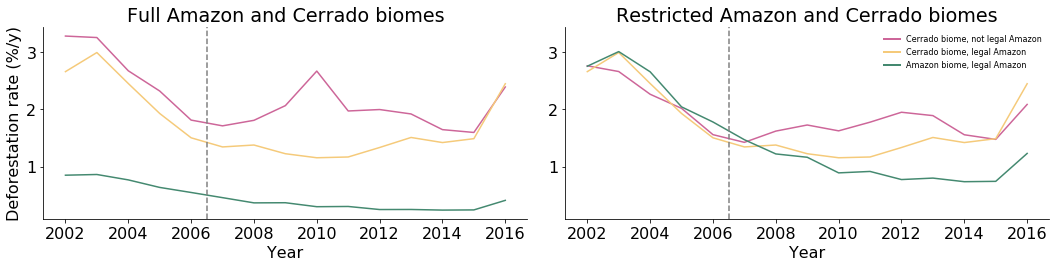

In [117]:
gs = gridspec.GridSpec(1, 2) 
fig = plt.figure(figsize=(15,4))
ax0 = plt.subplot(gs[0])
ax1 = plt.subplot(gs[1], sharex = ax0, sharey = ax0)
ax0.plot(defor_shr.columns, defor_shr_all.loc[(0, 0)], color = palette['notleg'], linestyle = '-')
ax0.plot(defor_shr.columns, defor_shr_all.loc[(0, 1)], color = palette['notbiom'], linestyle = '-')
ax0.plot(defor_shr.columns, defor_shr_all.loc[(1, 1)], color = palette['soym'], linestyle = '-')
ax1.plot(defor_shr.columns, defor_shr.loc[(0, 0)], color = palette['notleg'], linestyle = '-')
ax1.plot(defor_shr.columns, defor_shr.loc[(0, 1)], color = palette['notbiom'], linestyle = '-')
ax1.plot(defor_shr.columns, defor_shr.loc[(1, 1)], color = palette['soym'], linestyle = '-')
sns.despine()
handles = [plt.Line2D(range(10), range(10), linestyle='-', color = palette['notleg'], linewidth = 2),
           plt.Line2D(range(10), range(10), linestyle='-', color = palette['notbiom'], linewidth = 2),
           plt.Line2D(range(10), range(10), linestyle='-', color = palette['soym'], linewidth = 2)]
ax0.set_ylabel('Deforestation rate (%/y)')
ax0.set_xlabel('Year')
ax1.set_xlabel('Year')
ax0.axvline(x = 2006.5, color = 'grey', linestyle = '--')
ax1.axvline(x = 2006.5, color = 'grey', linestyle = '--')
labels = ['Cerrado biome, not legal Amazon', 'Cerrado biome, legal Amazon', 'Amazon biome, legal Amazon']
lgd = ax1.legend(handles, labels, fontsize = 8, frameon = False)
ax0.set_title("Full Amazon and Cerrado biomes")
ax1.set_title("Restricted Amazon and Cerrado biomes")
sns.despine()
fig.tight_layout()
ax0.xaxis.set_ticks(np.arange(2002, 2018, 2))
fig.savefig(data_dir + 'figures/methods_s1.svg')

## Paper calculations
### Impact calculations

In [79]:
out_var = 'mb2_vdefor'
defor = pd.pivot_table(sample_df, columns = 'year', index = ['soy_suit', 'biome', 'legal_amazon'], values = out_var, 
                       aggfunc = 'sum')
forest = pd.pivot_table(sample_df, columns = 'year', index = ['soy_suit', 'biome', 'legal_amazon'], values = out_var, 
                        aggfunc = 'count')
defor_shr = ((defor / forest) * 100).dropna(axis = 1).T.loc[2002:2016]
defor_shr = defor_shr.T

In [80]:
att = -0.0061 # From Table 1, column 5
bl_defor = (100-defor_shr.loc[(1,1,1), 2007:])/100
cf_defor = bl_defor + att
start_for = forest.loc[(1,1,1), 2006]
bl_cumdefor = bl_defor.cumprod().loc[2016]
cf_cumdefor = cf_defor.cumprod().loc[2016]
bl_forests = start_for * bl_cumdefor
cf_forests = start_for * cf_cumdefor
avoided_defor = (bl_forests - cf_forests) * 4
print("ASM saved " + str(int(avoided_defor)) + ' km2 of forests')
total_defor = (forest.loc[(1,1,1), 2006] - forest.loc[(1,1,1), 2016]) * 4
pct_reduction = avoided_defor / (total_defor + avoided_defor)
print("ASM reduced total deforestation by " + str(int(100*pct_reduction)) + " percent")

ASM saved 15827 km2 of forests
ASM reduced total deforestation by 34 percent


### Complementarities with public policies
In addition, our estimate of the impact of the ASM (-0.37 pp) represents only 18 percent of the 2.1 pp reduction in deforestation rates that occurred between 2002 and 2016 on soy-suitable locations in the Amazon biome portion of the Arc of Deforestation.

In [259]:
reduction = (defor_shr.loc[(1,1,1)][2003] - defor_shr.loc[(1,1,1)][2016])
reduction

2.1042103534076495

In [261]:
att * -100 / reduction

0.17821412169781825

### Research design
Since 93 percent of soy is planted in locations that meet specific soil and climatic suitability conditions, 

In [236]:
subset = wide_df.loc[(wide_df['dist_amb']>-buffer) & (wide_df['dist_aml']<buffer)]
suit_df = subset.pivot_table(index = 'a_soy_2017', columns = 'suit', values = 'ptid', aggfunc = len).loc[1]
suit_df[[1,2]].sum() / suit_df.sum()

0.9279414780884665

### Avoided deforestation
Prior to the adoption of the ASM, deforestation rates were similar on soy-suitable lands across the Amazon biome (XX% per year), the Cerrado-portion of the Legal Amazon (XX% per year) as well as the portion of the Cerrado biome outside of the Legal Amazon (XX% per year). Between 2006 and 2016, soy-suitable deforestation rates in the Amazon biome fell to XX%/year, XX pp/year below the rate of soy-suitable deforestation in the Cerrado portion of the Legal Amazon and XX pp/year below the rate in the Cerrado biome outside of the legal Amazon. 

In [242]:
defor = pd.pivot_table(sample_df.loc[sample_df['soy_suit']==1], columns = 'year', index = ['biome', 'legal_amazon'], values = 'mb2_vdefor', 
                       aggfunc = 'sum')
forest = pd.pivot_table(sample_df.loc[sample_df['soy_suit']==1], columns = 'year', index = ['biome', 'legal_amazon'], values = 'mb2_vdefor', 
                        aggfunc = 'count')
defor_shr = ((defor / forest) * 100).dropna(axis = 1).T.loc[2002:2017]
defor_shr = defor_shr.T
defor_shr[list(range(2002, 2007))].mean(axis = 1)

biome  legal_amazon
0      0               2.506959
       1               2.573302
1      0               0.559050
       1               2.668334
dtype: float64

In [245]:
p2_rates = defor_shr[list(range(2007, 2017))].mean(axis = 1)
p2_rates

biome  legal_amazon
0      0               1.965632
       1               1.557104
1      0               0.288479
       1               0.988385
dtype: float64

In [246]:
p2_rates.loc[(0,1)] - p2_rates.loc[(1,1)]

0.56871804168105422

In [247]:
p2_rates.loc[(0,0)] - p2_rates.loc[(1,1)]

0.9772464598010222

## Methods calculations
### Study region
This region captures 96 percent of the 2017 soy area in the Amazon biome as well as 96 percent of the area of forests converted to soy between 2000 and 2017. In addition, our study region contains almost all (94 percent) of the forests monitored by the Soy Working Group (GTS) between 2007 and 2014. 

In [131]:
defor_df['arc'] = (defor_df['dist_amb']>-300) & (defor_df['dist_aml']<300)

In [148]:
defor = pd.pivot_table(defor_df.loc[defor_df['biome']==1], columns = 'year', 
                       index = 'arc', values = 'a_soy_2017', aggfunc = 'sum')
defor = defor.sum(axis = 1)
defor[True] / defor.sum()

0.96212639744467265

In [149]:
soy_defor = pd.pivot_table(defor_df.loc[(defor_df['biome']==1) & (defor_df['a_soy_2017']==1)], columns = 'year', 
                       index = 'arc', values = 'mb2_vdefor', aggfunc = 'sum')
soy_defor = soy_defor.sum(axis = 1)
soy_defor[True] / soy_defor.sum()

0.96238172167089775

In [168]:
subset = defor_df.loc[(defor_df['mb2_vfor_2000']==1) & (defor_df['year']<2015)]
ever_gts = subset.pivot_table(index = 'ptid', values = 'gts', aggfunc = max)
ever_arc = subset.pivot_table(index = 'ptid', values = 'arc', aggfunc = max)
ever_gts = ever_gts.merge(ever_arc, left_index = True, right_index = True, how = 'left')
ctab = pd.crosstab(ever_gts['gts'], ever_gts['arc'])
ctab.loc[1, True] / ctab.loc[1].sum()

0.94427892424046156

### Sample creation
Across our study region, we sampled observations at each vertex of a grid of evenly spaced (2km) horizontal and vertical lines. This produced XX sample points with XX of those points falling inside the Amazon biome and XX points falling inside the Cerrado biome.  For each of these points, we extracted data from a variety of sources as outlined below.

In [188]:
subset = wide_df.loc[(wide_df['dist_amb']>-buffer) & (wide_df['dist_aml']<buffer)]
pt_description = subset.pivot_table(index = ['biome'], columns = 'mb2_vfor_2000', values = 'ptid', aggfunc = len)

In [189]:
pt_description.sum().sum()

463466

In [190]:
pt_description.sum(axis = 1)

biome
0    278847
1    184619
dtype: int64

In [ ]:

defor = sample_df.pivot_table(index = ['legal_amazon', 'biome'], columns = 'late', values = 'mb2_vdefor', aggfunc = np.sum)
start_for = sample_df.pivot_table(index = ['legal_amazon', 'biome'], columns = 'year', values = 'mb2_vdefor', aggfunc = 'count')[2007]
defor_rates = (defor[True] / start_for) / 10

In [29]:
defor_rates[(0,0)] - defor_rates[(1,1)]

0.0064024806478438206

### Functional form
However, given that annual deforestation events are relatively rare (mean annual deforestation = XX), a non-linear functional form might better represent our binary outcome variable. To test whether our results are robust to changes in the functional form of our model, we re-ran our primary model specification using a logistic regression. We found that the two models yielded similar results (Table D, Column 5). While our linear probability model indicates the ASM caused an XX percent reduction in deforestation, the odds ratio of the logistic regression indicates the ASM has caused an XX percent reduction in deforestation.

In [197]:
out_var = 'mb2_vdefor'
defor = pd.pivot_table(sample_df, columns = 'year', index = ['legal_amazon'], values = out_var, 
                       aggfunc = 'sum')
forest = pd.pivot_table(sample_df, columns = 'year', index = ['legal_amazon'], values = out_var, 
                        aggfunc = 'count')
defor_shr = ((defor / forest) * 100).dropna(axis = 1).T.loc[2002:2016]
defor_shr[1].mean()

1.5815028284185186

### Point and property fixed effects
To estimate this model we restricted our sample to the XX percent of points that fell within a property listed in one of the state or federal registries. 

In [147]:
subset = wide_df.loc[(wide_df['dist_amb']>-buffer) & (wide_df['dist_aml']<buffer)]
(subset['propid'].notnull()).astype(int).describe()['mean']

0.56961891487185679